In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_10per_ori_train='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/train_dof8_ori_base_25000k_10per.csv'
data_10per_ori_test='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_ori_base_25000k_10per.csv'
data_10per_09k1='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k1_25000k_10per.csv'
data_10per_09k3='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k3_25000k_10per.csv'
data_10per_09k5='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k5_25000k_10per.csv'
data_10per_09k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k7_25000k_10per.csv'
data_10per_085k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_085k7_25000k_10per.csv'
data_10per_09k3k7='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k3k7_25000k_10per.csv'
data_10per_09k2k8='/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/8DOF_system/test_dof8_dam_09k2k8_25000k_10per.csv'

import sys
sys.path.insert(0,'/content/drive/MyDrive/SHM_codes_data/SHM/cep_cofs/4DOF_system')
from evaluation import r2, MSE, CV, corr
from testing import*

In [4]:
# f18 means the force is at Loc1&8
f18_10per_ori_train=pd.read_csv(data_10per_ori_train,header=None).values

f18_10per_ori_test=pd.read_csv(data_10per_ori_test,header=None).values
f18_10per_09k1=pd.read_csv(data_10per_09k1,header=None).values
f18_10per_09k3=pd.read_csv(data_10per_09k3,header=None).values
f18_10per_09k5=pd.read_csv(data_10per_09k5,header=None).values
f18_10per_09k7=pd.read_csv(data_10per_09k7,header=None).values
f18_10per_085k7=pd.read_csv(data_10per_085k7,header=None).values
f18_10per_09k3k7=pd.read_csv(data_10per_09k3k7,header=None).values
f18_10per_09k2k8=pd.read_csv(data_10per_09k2k8,header=None).values

In [5]:
# Train data
print(f18_10per_ori_train.shape)
# The shape means (100ceps, 400realizations*8dof)

# Test data
f18_10per_09k1.shape
# The shape means (100ceps, 200realizations*8dof)

(100, 3200)


(100, 1600)

# **Extract each dof's data for training and testing**

In [6]:
# Function for extract each DOF data
def extract(data, num_rel, start, end):
  num=end-start
  dof1=data[start:end,num_rel*0:num_rel*1].T
  dof2=data[start:end,num_rel*1:num_rel*2].T
  dof3=data[start:end,num_rel*2:num_rel*3].T
  dof4=data[start:end,num_rel*3:num_rel*4].T
  dof5=data[start:end,num_rel*4:num_rel*5].T
  dof6=data[start:end,num_rel*5:num_rel*6].T
  dof7=data[start:end,num_rel*6:num_rel*7].T
  dof8=data[start:end,num_rel*7:num_rel*8].T

  return dof1, dof2, dof3, dof4, dof5, dof6, dof7, dof8


In [7]:
# Extract 8dofs undamaged training data first
start=1
end=51
num_rel_train=400
(ori_10per_dof1_train,
ori_10per_dof2_train,
ori_10per_dof3_train,
ori_10per_dof4_train,
ori_10per_dof5_train, 
ori_10per_dof6_train, 
ori_10per_dof7_train, 
ori_10per_dof8_train)=extract(f18_10per_ori_train, num_rel_train, start, end)

In [8]:
# Check dimension of the extracted training data
ori_10per_dof1_train.shape

(400, 50)

In [9]:
# Extract the testing data, including undamaged and damaged ones:
num_rel_test=200
# for undamaged case
(ori_10per_dof1_test,
ori_10per_dof2_test,
ori_10per_dof3_test,
ori_10per_dof4_test,
ori_10per_dof5_test, 
ori_10per_dof6_test, 
ori_10per_dof7_test, 
ori_10per_dof8_test)=extract(f18_10per_ori_test, num_rel_test, start, end)

# For damaged k1=0.9k0 case
(dam09k1_10per_dof1_test,
dam09k1_10per_dof2_test,
dam09k1_10per_dof3_test,
dam09k1_10per_dof4_test,
dam09k1_10per_dof5_test, 
dam09k1_10per_dof6_test, 
dam09k1_10per_dof7_test, 
dam09k1_10per_dof8_test)=extract(f18_10per_09k1, num_rel_test, start, end)

# For damaged k3=0.9k0 case
(dam09k3_10per_dof1_test,
dam09k3_10per_dof2_test,
dam09k3_10per_dof3_test,
dam09k3_10per_dof4_test,
dam09k3_10per_dof5_test, 
dam09k3_10per_dof6_test, 
dam09k3_10per_dof7_test, 
dam09k3_10per_dof8_test)=extract(f18_10per_09k3, num_rel_test, start, end)

# For damaged k5=0.9k0 case
(dam09k5_10per_dof1_test,
dam09k5_10per_dof2_test,
dam09k5_10per_dof3_test,
dam09k5_10per_dof4_test,
dam09k5_10per_dof5_test, 
dam09k5_10per_dof6_test, 
dam09k5_10per_dof7_test, 
dam09k5_10per_dof8_test)=extract(f18_10per_09k5, num_rel_test, start, end)

# For damaged k7=0.9k0 case
(dam09k7_10per_dof1_test,
dam09k7_10per_dof2_test,
dam09k7_10per_dof3_test,
dam09k7_10per_dof4_test,
dam09k7_10per_dof5_test, 
dam09k7_10per_dof6_test, 
dam09k7_10per_dof7_test, 
dam09k7_10per_dof8_test)=extract(f18_10per_09k7, num_rel_test, start, end)

# For damaged k7=0.85k0 case
(dam085k7_10per_dof1_test,
dam085k7_10per_dof2_test,
dam085k7_10per_dof3_test,
dam085k7_10per_dof4_test,
dam085k7_10per_dof5_test, 
dam085k7_10per_dof6_test, 
dam085k7_10per_dof7_test, 
dam085k7_10per_dof8_test)=extract(f18_10per_085k7, num_rel_test, start, end)

# For damaged k3k7=0.9k0 case
(dam09k3k7_10per_dof1_test,
dam09k3k7_10per_dof2_test,
dam09k3k7_10per_dof3_test,
dam09k3k7_10per_dof4_test,
dam09k3k7_10per_dof5_test, 
dam09k3k7_10per_dof6_test, 
dam09k3k7_10per_dof7_test, 
dam09k3k7_10per_dof8_test)=extract(f18_10per_09k3k7, num_rel_test, start, end)

# For damaged k2k8=0.9k0 case
(dam09k2k8_10per_dof1_test,
dam09k2k8_10per_dof2_test,
dam09k2k8_10per_dof3_test,
dam09k2k8_10per_dof4_test,
dam09k2k8_10per_dof5_test, 
dam09k2k8_10per_dof6_test, 
dam09k2k8_10per_dof7_test, 
dam09k2k8_10per_dof8_test)=extract(f18_10per_09k2k8, num_rel_test, start, end)

# **Next, normalization**

In [10]:
# First, get the combined training data to obtain the normalization scale (max and min):
combine=np.vstack((ori_10per_dof1_train,ori_10per_dof2_train))
combine=np.vstack((combine,ori_10per_dof3_train))
combine=np.vstack((combine,ori_10per_dof4_train))
combine=np.vstack((combine,ori_10per_dof5_train))
combine=np.vstack((combine,ori_10per_dof6_train))
combine=np.vstack((combine,ori_10per_dof7_train))
combine=np.vstack((combine,ori_10per_dof8_train))
target_train=combine
# Note: combine is used for normalization scale, and the target_train is used for obtaining the normalized training data!

In [11]:
target_train.shape

(3200, 50)

In [12]:
# Define normalization function
def norm(target,combine_train):
  norm_data=(target-np.min(combine_train))/(np.max(combine_train)-np.min(combine_train))
  return norm_data

In [13]:
norm_train=norm(target_train,combine)
norm_train.shape

(3200, 50)

In [14]:
# Next, shuffle the norm_train as a new variable for training only!
for_training=np.array(norm_train,copy=True)
# Then shuffle
np.random.shuffle(for_training)

In [15]:
# Next, normalize the undamaged testing data
norm_ori_dof1_test=norm(ori_10per_dof1_test,combine);
norm_ori_dof2_test=norm(ori_10per_dof2_test,combine)
norm_ori_dof3_test=norm(ori_10per_dof3_test,combine)
norm_ori_dof4_test=norm(ori_10per_dof4_test,combine)
norm_ori_dof5_test=norm(ori_10per_dof5_test,combine)
norm_ori_dof6_test=norm(ori_10per_dof6_test,combine)
norm_ori_dof7_test=norm(ori_10per_dof7_test,combine)
norm_ori_dof8_test=norm(ori_10per_dof8_test,combine)

# Then, let's choose the damaged case 1: k1=0.9k0 scenario for analysis:
norm_09k1_dof1_test=norm(dam09k1_10per_dof1_test,combine);
norm_09k1_dof2_test=norm(dam09k1_10per_dof2_test,combine)
norm_09k1_dof3_test=norm(dam09k1_10per_dof3_test,combine)
norm_09k1_dof4_test=norm(dam09k1_10per_dof4_test,combine)
norm_09k1_dof5_test=norm(dam09k1_10per_dof5_test,combine)
norm_09k1_dof6_test=norm(dam09k1_10per_dof6_test,combine)
norm_09k1_dof7_test=norm(dam09k1_10per_dof7_test,combine)
norm_09k1_dof8_test=norm(dam09k1_10per_dof8_test,combine)

# Then, let's choose the damaged case 2: k3=0.9k0 scenario for analysis:
norm_09k3_dof1_test=norm(dam09k3_10per_dof1_test,combine);
norm_09k3_dof2_test=norm(dam09k3_10per_dof2_test,combine)
norm_09k3_dof3_test=norm(dam09k3_10per_dof3_test,combine)
norm_09k3_dof4_test=norm(dam09k3_10per_dof4_test,combine)
norm_09k3_dof5_test=norm(dam09k3_10per_dof5_test,combine)
norm_09k3_dof6_test=norm(dam09k3_10per_dof6_test,combine)
norm_09k3_dof7_test=norm(dam09k3_10per_dof7_test,combine)
norm_09k3_dof8_test=norm(dam09k3_10per_dof8_test,combine)

# Then, let's choose the damaged case 3: k5=0.9k0 scenario for analysis:
norm_09k5_dof1_test=norm(dam09k5_10per_dof1_test,combine);
norm_09k5_dof2_test=norm(dam09k5_10per_dof2_test,combine)
norm_09k5_dof3_test=norm(dam09k5_10per_dof3_test,combine)
norm_09k5_dof4_test=norm(dam09k5_10per_dof4_test,combine)
norm_09k5_dof5_test=norm(dam09k5_10per_dof5_test,combine)
norm_09k5_dof6_test=norm(dam09k5_10per_dof6_test,combine)
norm_09k5_dof7_test=norm(dam09k5_10per_dof7_test,combine)
norm_09k5_dof8_test=norm(dam09k5_10per_dof8_test,combine)

# Then, let's choose the damaged case 4: k3k7=0.9k0 scenario for analysis:
norm_09k3k7_dof1_test=norm(dam09k3k7_10per_dof1_test,combine);
norm_09k3k7_dof2_test=norm(dam09k3k7_10per_dof2_test,combine)
norm_09k3k7_dof3_test=norm(dam09k3k7_10per_dof3_test,combine)
norm_09k3k7_dof4_test=norm(dam09k3k7_10per_dof4_test,combine)
norm_09k3k7_dof5_test=norm(dam09k3k7_10per_dof5_test,combine)
norm_09k3k7_dof6_test=norm(dam09k3k7_10per_dof6_test,combine)
norm_09k3k7_dof7_test=norm(dam09k3k7_10per_dof7_test,combine)
norm_09k3k7_dof8_test=norm(dam09k3k7_10per_dof8_test,combine)

In [16]:
# Check dimension:
print(norm_ori_dof1_test.shape)
print(norm_09k1_dof1_test.shape)

(200, 50)
(200, 50)


**Next, prepare another types of the ground truth, where it should be a combination of the other 7 DOFs' cepstral coefficients**

In [17]:
norm_train_dof1=norm_train[0:num_rel_train,:];
norm_train_dof2=norm_train[1*num_rel_train:2*num_rel_train,:];
norm_train_dof3=norm_train[2*num_rel_train:3*num_rel_train,:];
norm_train_dof4=norm_train[3*num_rel_train:4*num_rel_train,:];
norm_train_dof5=norm_train[4*num_rel_train:5*num_rel_train,:];
norm_train_dof6=norm_train[5*num_rel_train:6*num_rel_train,:];
norm_train_dof7=norm_train[6*num_rel_train:7*num_rel_train,:];
norm_train_dof8=norm_train[7*num_rel_train:8*num_rel_train,:];

# Set ground truth for DOF1
norm_train_dof1_newgt=1/7*(norm_train_dof2+norm_train_dof3+norm_train_dof4+norm_train_dof5+
                           norm_train_dof6+norm_train_dof7+norm_train_dof8)

norm_ori_dof1_test_newgt=1/7*(norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof4_test+norm_ori_dof5_test+
                           norm_ori_dof6_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof1_test_newgt=1/7*(norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof4_test+norm_09k1_dof5_test+
                           norm_09k1_dof6_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

norm_09k3_dof1_test_newgt=1/7*(norm_09k3_dof2_test+norm_09k3_dof3_test+norm_09k3_dof4_test+norm_09k3_dof5_test+
                           norm_09k3_dof6_test+norm_09k3_dof7_test+norm_09k3_dof8_test)

norm_09k5_dof1_test_newgt=1/7*(norm_09k5_dof2_test+norm_09k5_dof3_test+norm_09k5_dof4_test+norm_09k5_dof5_test+
                           norm_09k5_dof6_test+norm_09k5_dof7_test+norm_09k5_dof8_test)

norm_09k3k7_dof1_test_newgt=1/7*(norm_09k3k7_dof2_test+norm_09k3k7_dof3_test+norm_09k3k7_dof4_test+norm_09k3k7_dof5_test+
                           norm_09k3k7_dof6_test+norm_09k3k7_dof7_test+norm_09k3k7_dof8_test)

# Set ground truth for DOF2
norm_train_dof2_newgt=1/7*(norm_train_dof1+norm_train_dof3+norm_train_dof4+norm_train_dof5+
                           norm_train_dof6+norm_train_dof7+norm_train_dof8)

norm_ori_dof2_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof3_test+norm_ori_dof4_test+norm_ori_dof5_test+
                           norm_ori_dof6_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof2_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof3_test+norm_09k1_dof4_test+norm_09k1_dof5_test+
                           norm_09k1_dof6_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

# Set ground truth for DOF3
norm_train_dof3_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof4+norm_train_dof5+
                           norm_train_dof6+norm_train_dof7+norm_train_dof8)

norm_ori_dof3_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof4_test+norm_ori_dof5_test+
                           norm_ori_dof6_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof3_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof4_test+norm_09k1_dof5_test+
                           norm_09k1_dof6_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

norm_09k3_dof3_test_newgt=1/7*(norm_09k3_dof1_test+norm_09k3_dof2_test+norm_09k3_dof4_test+norm_09k3_dof5_test+
                           norm_09k3_dof6_test+norm_09k3_dof7_test+norm_09k3_dof8_test)

norm_09k5_dof3_test_newgt=1/7*(norm_09k5_dof1_test+norm_09k5_dof2_test+norm_09k5_dof4_test+norm_09k5_dof5_test+
                           norm_09k5_dof6_test+norm_09k5_dof7_test+norm_09k5_dof8_test)

norm_09k3k7_dof3_test_newgt=1/7*(norm_09k3k7_dof1_test+norm_09k3k7_dof2_test+norm_09k3k7_dof4_test+norm_09k3k7_dof5_test+
                           norm_09k3k7_dof6_test+norm_09k3k7_dof7_test+norm_09k3k7_dof8_test)

# Set ground truth for DOF4
norm_train_dof4_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof3+norm_train_dof5+
                           norm_train_dof6+norm_train_dof7+norm_train_dof8)

norm_ori_dof4_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof5_test+
                           norm_ori_dof6_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof4_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof5_test+
                           norm_09k1_dof6_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

# Set ground truth for DOF5
norm_train_dof5_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof3+norm_train_dof4+
                           norm_train_dof6+norm_train_dof7+norm_train_dof8)

norm_ori_dof5_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof4_test+
                           norm_ori_dof6_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof5_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof4_test+
                           norm_09k1_dof6_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

norm_09k3_dof5_test_newgt=1/7*(norm_09k3_dof1_test+norm_09k3_dof2_test+norm_09k3_dof3_test+norm_09k3_dof4_test+
                           norm_09k3_dof6_test+norm_09k3_dof7_test+norm_09k3_dof8_test)

norm_09k5_dof5_test_newgt=1/7*(norm_09k5_dof1_test+norm_09k5_dof2_test+norm_09k5_dof3_test+norm_09k5_dof4_test+
                           norm_09k5_dof6_test+norm_09k5_dof7_test+norm_09k5_dof8_test)

norm_09k3k7_dof5_test_newgt=1/7*(norm_09k3k7_dof1_test+norm_09k3k7_dof2_test+norm_09k3k7_dof3_test+norm_09k3k7_dof4_test+
                           norm_09k3k7_dof6_test+norm_09k3k7_dof7_test+norm_09k3k7_dof8_test)

# Set ground truth for DOF6
norm_train_dof6_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof3+norm_train_dof4+
                           norm_train_dof5+norm_train_dof7+norm_train_dof8)

norm_ori_dof6_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof4_test+
                           norm_ori_dof5_test+norm_ori_dof7_test+norm_ori_dof8_test)

norm_09k1_dof6_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof4_test+
                           norm_09k1_dof5_test+norm_09k1_dof7_test+norm_09k1_dof8_test)

# Set ground truth for DOF7
norm_train_dof7_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof3+norm_train_dof4+
                           norm_train_dof5+norm_train_dof6+norm_train_dof8)

norm_ori_dof7_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof4_test+
                           norm_ori_dof5_test+norm_ori_dof6_test+norm_ori_dof8_test)

norm_09k1_dof7_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof4_test+
                           norm_09k1_dof5_test+norm_09k1_dof6_test+norm_09k1_dof8_test)

norm_09k3_dof7_test_newgt=1/7*(norm_09k3_dof1_test+norm_09k3_dof2_test+norm_09k3_dof3_test+norm_09k3_dof4_test+
                           norm_09k3_dof5_test+norm_09k3_dof6_test+norm_09k3_dof8_test)

norm_09k5_dof7_test_newgt=1/7*(norm_09k5_dof1_test+norm_09k5_dof2_test+norm_09k5_dof3_test+norm_09k5_dof4_test+
                           norm_09k5_dof5_test+norm_09k5_dof6_test+norm_09k5_dof8_test)

norm_09k3k7_dof7_test_newgt=1/7*(norm_09k3k7_dof1_test+norm_09k3k7_dof2_test+norm_09k3k7_dof3_test+norm_09k3k7_dof4_test+
                           norm_09k3k7_dof5_test+norm_09k3k7_dof6_test+norm_09k3k7_dof8_test)

# Set ground truth for DOF8
norm_train_dof8_newgt=1/7*(norm_train_dof1+norm_train_dof2+norm_train_dof3+norm_train_dof4+
                           norm_train_dof5+norm_train_dof6+norm_train_dof7)

norm_ori_dof8_test_newgt=1/7*(norm_ori_dof1_test+norm_ori_dof2_test+norm_ori_dof3_test+norm_ori_dof4_test+
                           norm_ori_dof5_test+norm_ori_dof6_test+norm_ori_dof7_test)

norm_09k1_dof8_test_newgt=1/7*(norm_09k1_dof1_test+norm_09k1_dof2_test+norm_09k1_dof3_test+norm_09k1_dof4_test+
                           norm_09k1_dof5_test+norm_09k1_dof6_test+norm_09k1_dof7_test)

# **Next, combine all new ground truth for training**

In [18]:
norm_train_newgt=np.zeros((num_rel_train*8,50))
norm_train_newgt[0:num_rel_train,:]=norm_train_dof1_newgt
norm_train_newgt[num_rel_train*1:num_rel_train*2,:]=norm_train_dof2_newgt
norm_train_newgt[num_rel_train*2:num_rel_train*3,:]=norm_train_dof3_newgt
norm_train_newgt[num_rel_train*3:num_rel_train*4,:]=norm_train_dof4_newgt
norm_train_newgt[num_rel_train*4:num_rel_train*5,:]=norm_train_dof5_newgt
norm_train_newgt[num_rel_train*5:num_rel_train*6,:]=norm_train_dof6_newgt
norm_train_newgt[num_rel_train*6:num_rel_train*7,:]=norm_train_dof7_newgt
norm_train_newgt[num_rel_train*7:num_rel_train*8,:]=norm_train_dof8_newgt

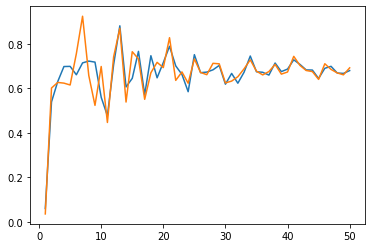

In [19]:
plt.plot(np.arange(1,51),norm_train_dof3_newgt[1,:])
plt.plot(np.arange(1,51),norm_train_dof3[1,:])

# **Next, set up an autoencoder architecture**

In [20]:
# Set up architurecture:
#def AE(input_size, hidden_size):
def AE():
  inp = tf.keras.Input(shape=50)

  #hidden1 = tf.keras.layers.Dense(units=25,
  #                               kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
  #                               #bias_initializer=initializers.Zeros(),
  #                               activation="sigmoid",
  #                               #activity_regularizer=tf.keras.regularizers.L1(0.01)
  #                              )(inp)

  hidden2 = tf.keras.layers.Dense(units=10,
                                 kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
                                 #bias_initializer=initializers.Zeros(),
                                 activation="sigmoid",
                                #activity_regularizer=tf.keras.regularizers.L1(0.01),
                                )(inp)

  #hidden3 = tf.keras.layers.Dense(units=25,
  #                               kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
  #                               #bias_initializer=initializers.Zeros(),
  #                               activation="sigmoid",
  #                               #activity_regularizer=tf.keras.regularizers.L1(0.01)
  #                              )(hidden2)                              

  outp = tf.keras.layers.Dense(units=50,
                              kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.1),
                              activation="sigmoid",
                              #activity_regularizer=tf.keras.regularizers.L1(0.01)
                            )(hidden2)
  md = tf.keras.Model(inputs=inp, outputs=outp)

  return md

# Define a model
model1=AE()
model2=AE()

In [21]:
model1.summary()
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='adam'
)
#opt=tf.keras.optimizers.SGD(
#    learning_rate=0.001)

model2.summary()
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='adam'
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
Total params: 1,060
Trainable params: 1,060
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
__________________________________________

In [22]:
# Define a loss function:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

model1.compile(optimizer=opt, loss='mse')

history=model1.fit(norm_train_dof1,
                 norm_train_dof1,
                 batch_size=32,
                 epochs=1000,
                 shuffle=True,
                 initial_epoch=0)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 13/1000
13/13 [====

In [23]:
# Model2 for training new ground truth data
model2.compile(optimizer=opt, loss='mse')

history=model2.fit(norm_train_dof1,
                 norm_train_dof1_newgt,
                 batch_size=32,
                 epochs=500,
                 shuffle=True,
                 initial_epoch=0)

Epoch 1/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 6.0686e-04
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 4.0968e-04
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 3.4331e-04
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 3.4730e-04
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 3.3600e-04
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2258e-04
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 3.1902e-04
Epoch 11/500
13/13 [==============================] - 0s 2ms/step - loss: 3.0322e-04
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 3.3917e-04
E

In [24]:
# First, get the reconstruction of training set
rec_train=model1.predict(norm_train)

# Get results (reconstruction of new-ground-truth) of model2
rec_train_newgt=model2.predict(norm_train)

In [25]:
# Reconstruction of original output
rec_train_dof1=rec_train[0:num_rel_train,:]; 
rec_train_dof2=rec_train[1*num_rel_train:2*num_rel_train,:]; 
rec_train_dof3=rec_train[2*num_rel_train:3*num_rel_train,:]; 
rec_train_dof4=rec_train[3*num_rel_train:4*num_rel_train,:]; 
rec_train_dof5=rec_train[4*num_rel_train:5*num_rel_train,:]; 
rec_train_dof6=rec_train[5*num_rel_train:6*num_rel_train,:]; 
rec_train_dof7=rec_train[6*num_rel_train:7*num_rel_train,:]; 
rec_train_dof8=rec_train[7*num_rel_train:8*num_rel_train,:]; 

In [26]:
# Reconstruction of new groud truth output
rec_train_dof1_newgt=rec_train_newgt[0:num_rel_train,:]; 
rec_train_dof2_newgt=rec_train_newgt[1*num_rel_train:2*num_rel_train,:]; 
rec_train_dof3_newgt=rec_train_newgt[2*num_rel_train:3*num_rel_train,:]; 
rec_train_dof4_newgt=rec_train_newgt[3*num_rel_train:4*num_rel_train,:]; 
rec_train_dof5_newgt=rec_train_newgt[4*num_rel_train:5*num_rel_train,:]; 
rec_train_dof6_newgt=rec_train_newgt[5*num_rel_train:6*num_rel_train,:]; 
rec_train_dof7_newgt=rec_train_newgt[6*num_rel_train:7*num_rel_train,:]; 
rec_train_dof8_newgt=rec_train_newgt[7*num_rel_train:8*num_rel_train,:]; 

In [27]:
# Check undamaged testing set of each DOF:
rec_ori_dof1_test=model1.predict(norm_ori_dof1_test)
rec_ori_dof2_test=model1.predict(norm_ori_dof2_test)
rec_ori_dof3_test=model1.predict(norm_ori_dof3_test)
rec_ori_dof4_test=model1.predict(norm_ori_dof4_test)
rec_ori_dof5_test=model1.predict(norm_ori_dof5_test)
rec_ori_dof6_test=model1.predict(norm_ori_dof6_test)
rec_ori_dof7_test=model1.predict(norm_ori_dof7_test)
rec_ori_dof8_test=model1.predict(norm_ori_dof8_test)

# Get results of model2
rec_ori_dof1_test_newgt=model2.predict(norm_ori_dof1_test)
rec_ori_dof2_test_newgt=model2.predict(norm_ori_dof2_test)
rec_ori_dof3_test_newgt=model2.predict(norm_ori_dof3_test)
rec_ori_dof4_test_newgt=model2.predict(norm_ori_dof4_test)
rec_ori_dof5_test_newgt=model2.predict(norm_ori_dof5_test)
rec_ori_dof6_test_newgt=model2.predict(norm_ori_dof6_test)
rec_ori_dof7_test_newgt=model2.predict(norm_ori_dof7_test)
rec_ori_dof8_test_newgt=model2.predict(norm_ori_dof8_test)

In [28]:
# Check damage-case1: k1=0.9k0 of each DOF:
rec_09k1_dof1_test=model1.predict(norm_09k1_dof1_test)
rec_09k1_dof2_test=model1.predict(norm_09k1_dof2_test)
rec_09k1_dof3_test=model1.predict(norm_09k1_dof3_test)
rec_09k1_dof4_test=model1.predict(norm_09k1_dof4_test)
rec_09k1_dof5_test=model1.predict(norm_09k1_dof5_test)
rec_09k1_dof6_test=model1.predict(norm_09k1_dof6_test)
rec_09k1_dof7_test=model1.predict(norm_09k1_dof7_test)
rec_09k1_dof8_test=model1.predict(norm_09k1_dof8_test)

# Check damage-case2: k3=0.9k0 of each DOF:
rec_09k3_dof1_test=model1.predict(norm_09k3_dof1_test)
rec_09k3_dof2_test=model1.predict(norm_09k3_dof2_test)
rec_09k3_dof3_test=model1.predict(norm_09k3_dof3_test)
rec_09k3_dof4_test=model1.predict(norm_09k3_dof4_test)
rec_09k3_dof5_test=model1.predict(norm_09k3_dof5_test)
rec_09k3_dof6_test=model1.predict(norm_09k3_dof6_test)
rec_09k3_dof7_test=model1.predict(norm_09k3_dof7_test)
rec_09k3_dof8_test=model1.predict(norm_09k3_dof8_test)

# Check damage-case3: k5=0.9k0 of each DOF:
rec_09k5_dof1_test=model1.predict(norm_09k5_dof1_test)
rec_09k5_dof2_test=model1.predict(norm_09k5_dof2_test)
rec_09k5_dof3_test=model1.predict(norm_09k5_dof3_test)
rec_09k5_dof4_test=model1.predict(norm_09k5_dof4_test)
rec_09k5_dof5_test=model1.predict(norm_09k5_dof5_test)
rec_09k5_dof6_test=model1.predict(norm_09k5_dof6_test)
rec_09k5_dof7_test=model1.predict(norm_09k5_dof7_test)
rec_09k5_dof8_test=model1.predict(norm_09k5_dof8_test)

# Check damage-case4: k3k7=0.9k0 of each DOF:
rec_09k3k7_dof1_test=model1.predict(norm_09k3k7_dof1_test)
rec_09k3k7_dof2_test=model1.predict(norm_09k3k7_dof2_test)
rec_09k3k7_dof3_test=model1.predict(norm_09k3k7_dof3_test)
rec_09k3k7_dof4_test=model1.predict(norm_09k3k7_dof4_test)
rec_09k3k7_dof5_test=model1.predict(norm_09k3k7_dof5_test)
rec_09k3k7_dof6_test=model1.predict(norm_09k3k7_dof6_test)
rec_09k3k7_dof7_test=model1.predict(norm_09k3k7_dof7_test)
rec_09k3k7_dof8_test=model1.predict(norm_09k3k7_dof8_test)



In [29]:
# Get results of model2
# damage case 1
rec_09k1_dof1_test_newgt=model2.predict(norm_09k1_dof1_test)
rec_09k1_dof2_test_newgt=model2.predict(norm_09k1_dof2_test)
rec_09k1_dof3_test_newgt=model2.predict(norm_09k1_dof3_test)
rec_09k1_dof4_test_newgt=model2.predict(norm_09k1_dof4_test)
rec_09k1_dof5_test_newgt=model2.predict(norm_09k1_dof5_test)
rec_09k1_dof6_test_newgt=model2.predict(norm_09k1_dof6_test)
rec_09k1_dof7_test_newgt=model2.predict(norm_09k1_dof7_test)
rec_09k1_dof8_test_newgt=model2.predict(norm_09k1_dof8_test)

# damage case 2
rec_09k3_dof1_test_newgt=model2.predict(norm_09k3_dof1_test)
rec_09k3_dof2_test_newgt=model2.predict(norm_09k3_dof2_test)
rec_09k3_dof3_test_newgt=model2.predict(norm_09k3_dof3_test)
rec_09k3_dof4_test_newgt=model2.predict(norm_09k3_dof4_test)
rec_09k3_dof5_test_newgt=model2.predict(norm_09k3_dof5_test)
rec_09k3_dof6_test_newgt=model2.predict(norm_09k3_dof6_test)
rec_09k3_dof7_test_newgt=model2.predict(norm_09k3_dof7_test)
rec_09k3_dof8_test_newgt=model2.predict(norm_09k3_dof8_test)

# damage case 3
rec_09k5_dof1_test_newgt=model2.predict(norm_09k5_dof1_test)
rec_09k5_dof2_test_newgt=model2.predict(norm_09k5_dof2_test)
rec_09k5_dof3_test_newgt=model2.predict(norm_09k5_dof3_test)
rec_09k5_dof4_test_newgt=model2.predict(norm_09k5_dof4_test)
rec_09k5_dof5_test_newgt=model2.predict(norm_09k5_dof5_test)
rec_09k5_dof6_test_newgt=model2.predict(norm_09k5_dof6_test)
rec_09k5_dof7_test_newgt=model2.predict(norm_09k5_dof7_test)
rec_09k5_dof8_test_newgt=model2.predict(norm_09k5_dof8_test)

# damage case 4
rec_09k3k7_dof1_test_newgt=model2.predict(norm_09k3k7_dof1_test)
rec_09k3k7_dof2_test_newgt=model2.predict(norm_09k3k7_dof2_test)
rec_09k3k7_dof3_test_newgt=model2.predict(norm_09k3k7_dof3_test)
rec_09k3k7_dof4_test_newgt=model2.predict(norm_09k3k7_dof4_test)
rec_09k3k7_dof5_test_newgt=model2.predict(norm_09k3k7_dof5_test)
rec_09k3k7_dof6_test_newgt=model2.predict(norm_09k3k7_dof6_test)
rec_09k3k7_dof7_test_newgt=model2.predict(norm_09k3k7_dof7_test)
rec_09k3k7_dof8_test_newgt=model2.predict(norm_09k3k7_dof8_test)

In [30]:
# Define a visualization function:
def visual(reco, orig, start_index, end_index, rel, dof):
  c=np.arange(start_index,end_index,1) # only visualize 2-51th cepstral coefficients
  plt.figure(figsize=(8,6))
  #plt.title('Observation vs reconstruction for training set',fontsize=14)
  plt.plot(c,orig[rel,:],color='blue', linewidth=1, label='Observed cepstral cefficients (DOF%d)' %dof)
  plt.plot(c,reco[rel,:],color='red', linewidth=1, label='Reconstructed cepstral coefficients (DOF%d)' %dof)
  plt.legend(fontsize=12)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.xlabel('Index of cepstral coefficients',size=15)
  plt.ylabel('Magnitude',size=15)
  plt.grid()


**Visualize the original vs reconstruction CC of training set.**

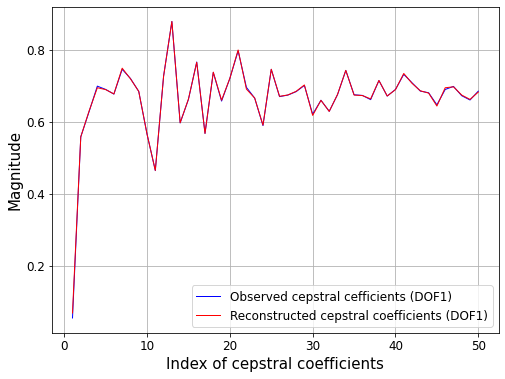

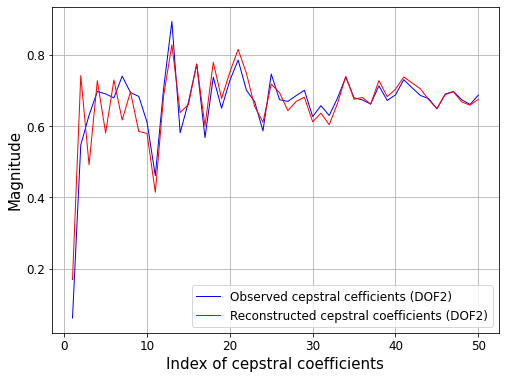

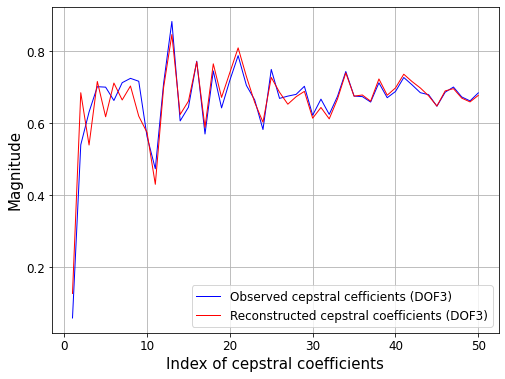

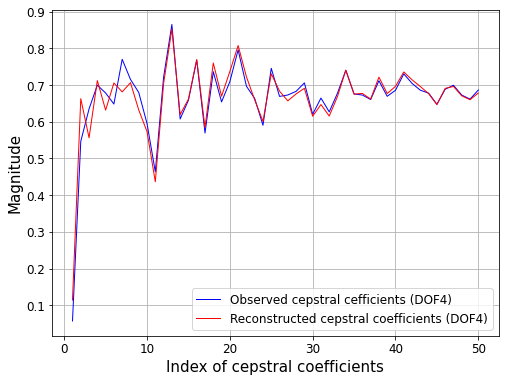

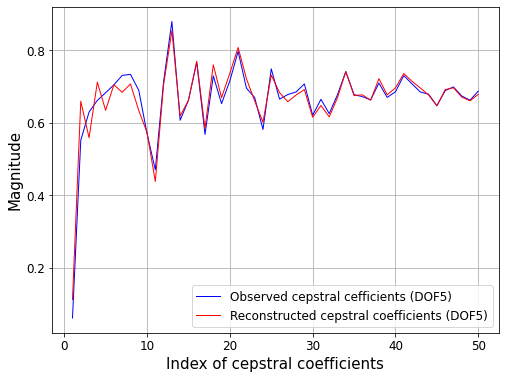

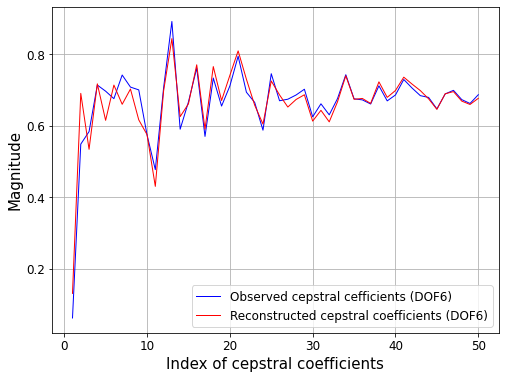

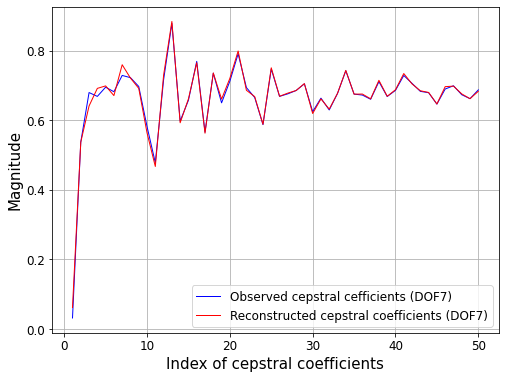

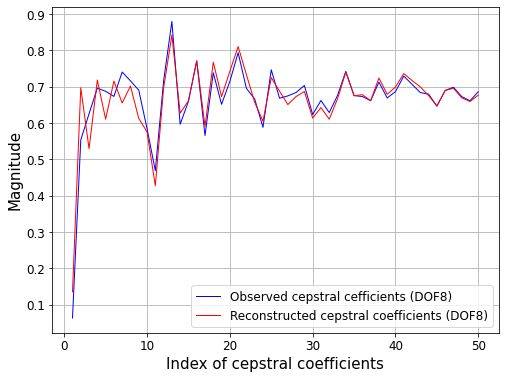

In [31]:
vis_rel=16
'''# Visualize the original output ground truth
visual(rec_train_dof1,norm_train_dof1,start,end,vis_rel,1)
visual(rec_train_dof2,norm_train_dof2,start,end,vis_rel,2)
visual(rec_train_dof3,norm_train_dof3,start,end,vis_rel,3)
visual(rec_train_dof4,norm_train_dof4,start,end,vis_rel,4)
visual(rec_train_dof5,norm_train_dof5,start,end,vis_rel,5)
visual(rec_train_dof6,norm_train_dof6,start,end,vis_rel,6)
visual(rec_train_dof7,norm_train_dof7,start,end,vis_rel,7)
visual(rec_train_dof8,norm_train_dof8,start,end,vis_rel,8)'''

# visualize new ground truth reconstruction accuracy
visual(rec_train_dof1_newgt,norm_train_dof1_newgt,start,end,vis_rel,1)
visual(rec_train_dof2_newgt,norm_train_dof2_newgt,start,end,vis_rel,2)
visual(rec_train_dof3_newgt,norm_train_dof3_newgt,start,end,vis_rel,3)
visual(rec_train_dof4_newgt,norm_train_dof4_newgt,start,end,vis_rel,4)
visual(rec_train_dof5_newgt,norm_train_dof5_newgt,start,end,vis_rel,5)
visual(rec_train_dof6_newgt,norm_train_dof6_newgt,start,end,vis_rel,6)
visual(rec_train_dof7_newgt,norm_train_dof7_newgt,start,end,vis_rel,7)
visual(rec_train_dof8_newgt,norm_train_dof8_newgt,start,end,vis_rel,8)

**Visualize the undamaged testing set**

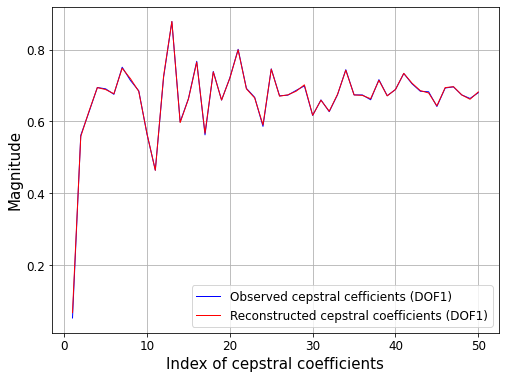

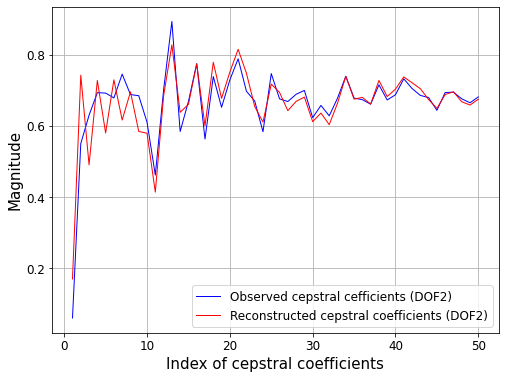

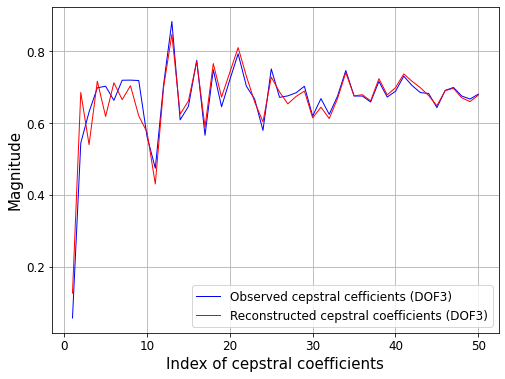

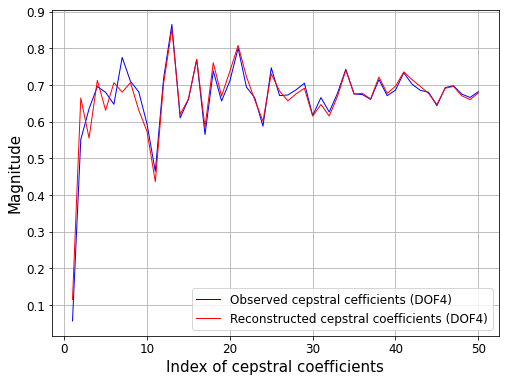

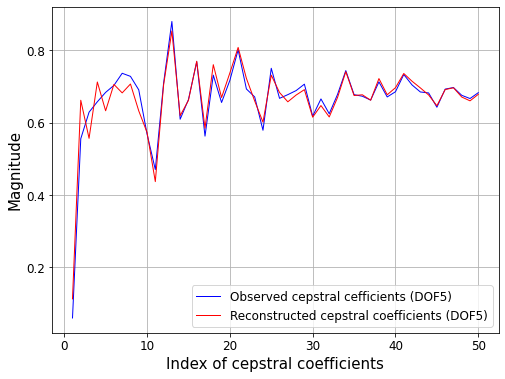

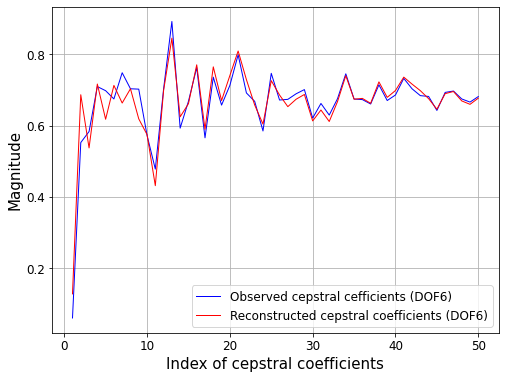

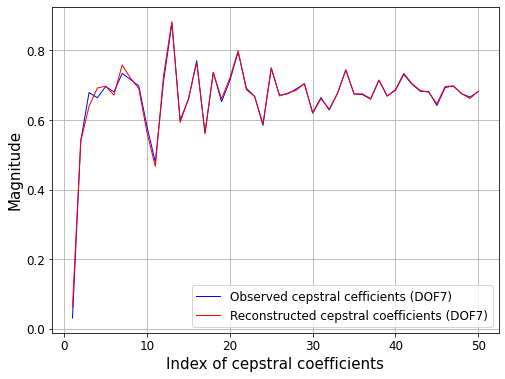

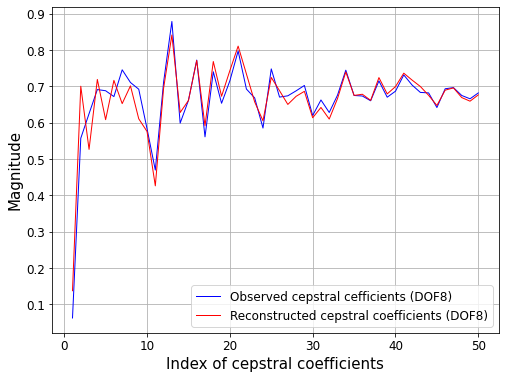

In [32]:
'''# Visualize original undamaged testing output
visual(rec_ori_dof1_test,norm_ori_dof1_test,start,end,3,1)
visual(rec_ori_dof2_test,norm_ori_dof2_test,start,end,3,2)
visual(rec_ori_dof3_test,norm_ori_dof3_test,start,end,3,3)
visual(rec_ori_dof4_test,norm_ori_dof4_test,start,end,3,4)
visual(rec_ori_dof5_test,norm_ori_dof5_test,start,end,3,5)
visual(rec_ori_dof6_test,norm_ori_dof6_test,start,end,3,6)
visual(rec_ori_dof7_test,norm_ori_dof7_test,start,end,3,7)
visual(rec_ori_dof8_test,norm_ori_dof8_test,start,end,3,8)'''

visual(rec_ori_dof1_test_newgt,norm_ori_dof1_test_newgt,start,end,3,1)
visual(rec_ori_dof2_test_newgt,norm_ori_dof2_test_newgt,start,end,3,2)
visual(rec_ori_dof3_test_newgt,norm_ori_dof3_test_newgt,start,end,3,3)
visual(rec_ori_dof4_test_newgt,norm_ori_dof4_test_newgt,start,end,3,4)
visual(rec_ori_dof5_test_newgt,norm_ori_dof5_test_newgt,start,end,3,5)
visual(rec_ori_dof6_test_newgt,norm_ori_dof6_test_newgt,start,end,3,6)
visual(rec_ori_dof7_test_newgt,norm_ori_dof7_test_newgt,start,end,3,7)
visual(rec_ori_dof8_test_newgt,norm_ori_dof8_test_newgt,start,end,3,8)

**Visualize the damaged case 1: k1=0.9k0**

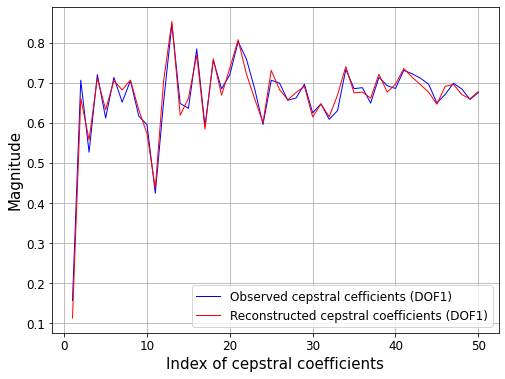

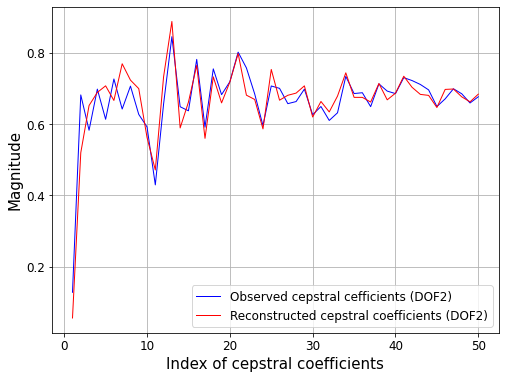

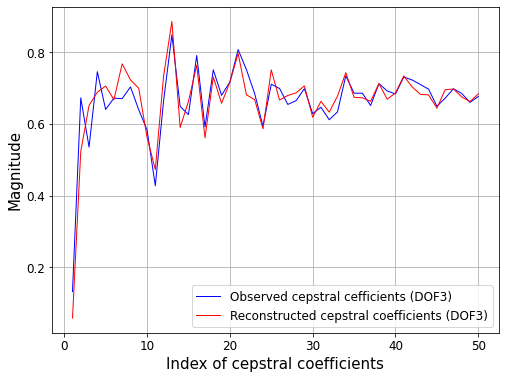

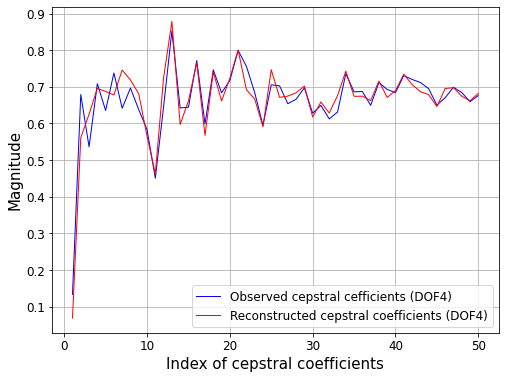

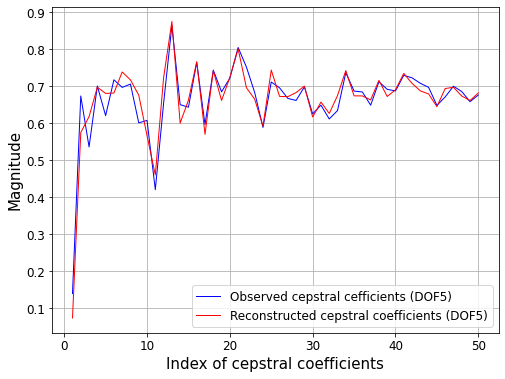

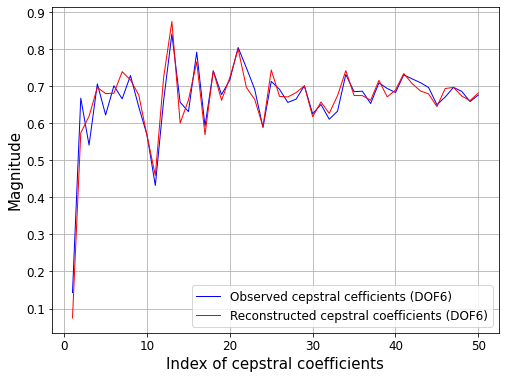

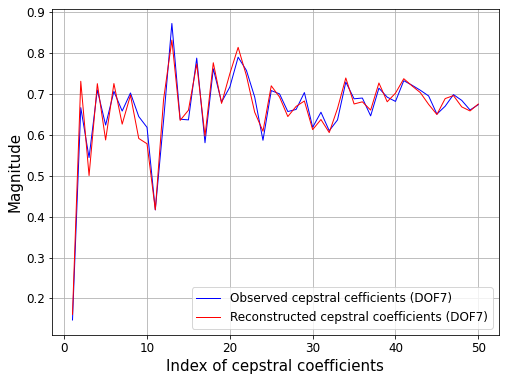

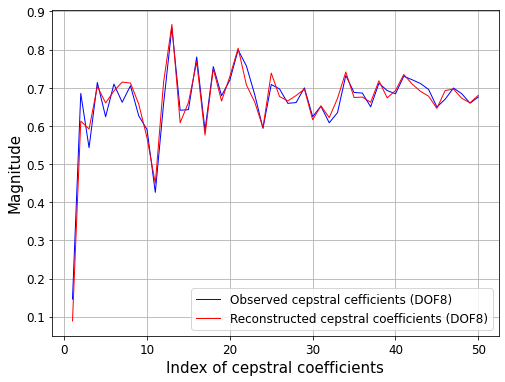

In [33]:
'''visual(rec_09k1_dof1_test,norm_09k1_dof1_test,start,end,3,1)
visual(rec_09k1_dof2_test,norm_09k1_dof2_test,start,end,3,2)
visual(rec_09k1_dof3_test,norm_09k1_dof3_test,start,end,3,3)
visual(rec_09k1_dof4_test,norm_09k1_dof4_test,start,end,3,4)
visual(rec_09k1_dof5_test,norm_09k1_dof5_test,start,end,3,5)
visual(rec_09k1_dof6_test,norm_09k1_dof6_test,start,end,3,6)
visual(rec_09k1_dof7_test,norm_09k1_dof7_test,start,end,3,7)
visual(rec_09k1_dof8_test,norm_09k1_dof8_test,start,end,3,8)'''

visual(rec_09k1_dof1_test_newgt,norm_09k1_dof1_test_newgt,start,end,3,1)
visual(rec_09k1_dof2_test_newgt,norm_09k1_dof2_test_newgt,start,end,3,2)
visual(rec_09k1_dof3_test_newgt,norm_09k1_dof3_test_newgt,start,end,3,3)
visual(rec_09k1_dof4_test_newgt,norm_09k1_dof4_test_newgt,start,end,3,4)
visual(rec_09k1_dof5_test_newgt,norm_09k1_dof5_test_newgt,start,end,3,5)
visual(rec_09k1_dof6_test_newgt,norm_09k1_dof6_test_newgt,start,end,3,6)
visual(rec_09k1_dof7_test_newgt,norm_09k1_dof7_test_newgt,start,end,3,7)
visual(rec_09k1_dof8_test_newgt,norm_09k1_dof8_test_newgt,start,end,3,8)

In [34]:
'''print("DOF1-to-DOF1 reconstruction evaluation \n(training of undamaged scenario):")
mse_train_dof1=MSE(rec_train_dof1,norm_train_dof1)
cv_train_dof1=CV(rec_train_dof1,norm_train_dof1)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')'''

print("DOF1-to-DOF1 new-ground-truth reconstruction evaluation \n(training of undamaged scenario):")
mse_train_dof1=MSE(rec_train_dof1_newgt,norm_train_dof1_newgt)
cv_train_dof1=CV(rec_train_dof1_newgt,norm_train_dof1_newgt)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')

DOF1-to-DOF1 new-ground-truth reconstruction evaluation 
(training of undamaged scenario):
MSE: 9.526e-06
CV: 4.611e-03 



In [35]:
'''print("DOF1-to-DOF1 reconstruction evaluation \n(testing of undamaged scenario):")
mse_train_dof1=MSE(rec_ori_dof1_test,norm_ori_dof1_test)
cv_train_dof1=CV(rec_ori_dof1_test,norm_ori_dof1_test)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')'''

print("DOF1-to-DOF1 new-ground-truth reconstruction evaluation \n(testing of undamaged scenario):")
mse_train_dof1=MSE(rec_ori_dof1_test_newgt,norm_ori_dof1_test_newgt)
cv_train_dof1=CV(rec_ori_dof1_test_newgt,norm_ori_dof1_test_newgt)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')

DOF1-to-DOF1 new-ground-truth reconstruction evaluation 
(testing of undamaged scenario):
MSE: 9.528e-06
CV: 4.603e-03 



In [36]:
'''print("DOF1-to-DOF1 reconstruction evaluation \n(testing of k1=0.9k0 scenario):")
mse_train_dof1=MSE(rec_09k1_dof1_test,norm_09k1_dof1_test)
cv_train_dof1=CV(rec_09k1_dof1_test,norm_09k1_dof1_test)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')'''

print("DOF1-to-DOF1 new-ground-truth reconstruction evaluation \n(testing of k1=0.9k0 scenario):")
mse_train_dof1=MSE(rec_09k1_dof1_test,norm_09k1_dof1_test)
cv_train_dof1=CV(rec_09k1_dof1_test,norm_09k1_dof1_test)
print('MSE: {:.3e}'.format(mse_train_dof1))
print('CV: {:.3e}'.format(cv_train_dof1),'\n')

DOF1-to-DOF1 new-ground-truth reconstruction evaluation 
(testing of k1=0.9k0 scenario):
MSE: 1.592e-04
CV: 1.898e-02 



# **Then, visualize the hidden layer output**

In [37]:
# Check hidden outputs
hidden_layer1=model1.layers[1]
hidden_model1=tf.keras.Model(inputs=model1.input,outputs=hidden_layer1.output)

hidden_layer2=model2.layers[1]
hidden_model2=tf.keras.Model(inputs=model2.input,outputs=hidden_layer2.output)

In [38]:
# Get training and testing sets hidden output:
H_train_dof1=hidden_model1.predict(norm_train_dof1)
H_test_ori_dof1=hidden_model1.predict(norm_ori_dof1_test)
H_test_09k1_dof1=hidden_model1.predict(norm_09k1_dof1_test)

H_train_dof1_newgt=hidden_model1.predict(norm_train_dof1)
H_test_ori_dof1_newgt=hidden_model1.predict(norm_ori_dof1_test)
H_test_09k1_dof1_newgt=hidden_model1.predict(norm_09k1_dof1_test)

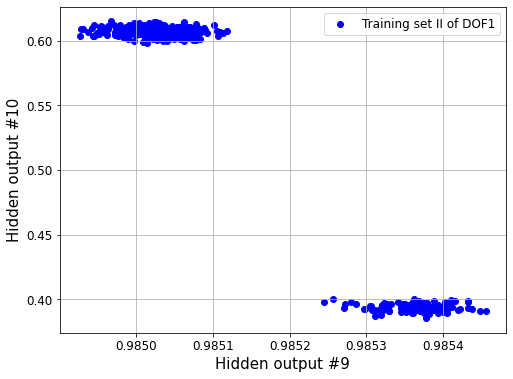

In [67]:
# Hidden output of 1-to-2 case
plt.figure(figsize=(8,6))
#plt.subplot(221)
f1=8;
f2=9;
plt.scatter(H_train_dof1[:,f1],H_train_dof1[:,f2], color='blue')
#plt.scatter(H_test_ori_dof1[:,f1],H_test_ori_dof1[:,f2], color='red')
#plt.scatter(H_test_09k1_dof1[:,f1],H_test_09k1_dof1[:,f2], color='orange')
plt.legend(['Training set II of DOF1'],fontsize=12)
#plt.legend(['Training set II','Testing set I of US','Testing set I of DS1'],fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Hidden output #'+str(f1+1),size=15)
plt.ylabel('Hidden output #'+str(f2+1),size=15)
plt.grid()
plt.show()

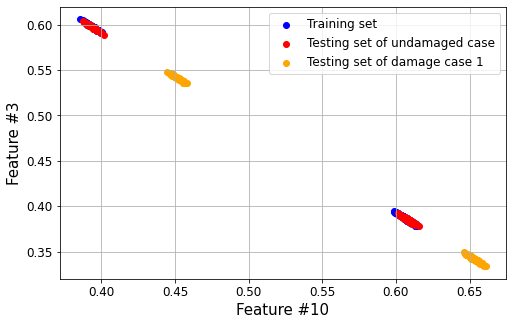

In [40]:
# visual the hidden outputs of model2
plt.figure(figsize=(8,5))
#plt.subplot(221)
f1=9;
f2=2;
plt.scatter(H_train_dof1_newgt[:,f1],H_train_dof1_newgt[:,f2], color='blue')
plt.scatter(H_test_ori_dof1_newgt[:,f1],H_test_ori_dof1_newgt[:,f2], color='red')
plt.scatter(H_test_09k1_dof1_newgt[:,f1],H_test_09k1_dof1_newgt[:,f2], color='orange')
plt.legend(['Training set','Testing set of undamaged case','Testing set of damage case 1'],fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Feature #'+str(f1+1),size=15)
plt.ylabel('Feature #'+str(f2+1),size=15)
plt.grid()
plt.show()

**Try one class SVM for hidden outputs**

In [41]:
from sklearn.svm import OneClassSVM
H_combine_plus09k1=np.zeros((200+200,10))
H_combine_plus09k1[0:200,:]=H_test_ori_dof1
H_combine_plus09k1[200:400,:]=H_test_09k1_dof1

clf = OneClassSVM(gamma='auto').fit(H_train_dof1)
prediction=clf.predict(H_combine_plus09k1)

In [42]:
# Training prediction:
test_ori_pred=prediction[0:200]
test_09k1_pred=prediction[200:400]

In [43]:
# See accuracy!
print(np.sum(test_ori_pred-1))
print(np.sum(test_09k1_pred-1))
# Results are not good!!!

-232
-294


# **Next, visualize the damage sensitive features**

In [44]:
# Calculate individual mse, CV,  divergence as damage sensitive features:
# Calculate the individual mse:
def ind_mse(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    error=ori[i,:]-rec[i,:]
    ind[i]=np.mean(error**2)
  return ind

# Calculate the individual CV:
def ind_cv(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    error=ori[i,:]-rec[i,:]
    norminator=np.sqrt(np.mean(error**2))
    ind[i]=norminator/np.mean(ori[i,:])
  return ind

# Calculate the standard deviation ratio:
def ind_stdr(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    ind[i]=np.std(rec[i,:])/np.std(ori[i,:])
  return ind

def ind_orsr(ori,rec):
  ind=np.zeros(ori.shape[0])
  for i in range(ori.shape[0]):
    ind[i]=np.log(np.sum(ori[i,:]**2)/np.sum(rec[i,:]**2))
  return ind

In [45]:
# Get DOF1 MSE results
train_dof1_mse=ind_mse(norm_train_dof1,rec_train_dof1)
test_ori_dof1_mse=ind_mse(norm_ori_dof1_test,rec_ori_dof1_test)
test_09k1_dof1_mse=ind_mse(norm_09k1_dof1_test,rec_09k1_dof1_test)
#test_09k3_dof1_mse=ind_mse(norm_09k3_dof1_test,rec_09k3_dof1_test)

#train_dof1_newgt_mse=ind_mse(norm_train_dof1_newgt, rec_train_dof1_newgt)
#test_ori_dof1_newgt_mse=ind_mse(norm_ori_dof1_test_newgt, rec_ori_dof1_test_newgt)

# Get cv results
'''train_dof1_cv=ind_cv(norm_train_dof1,rec_train_dof1)
test_ori_dof1_cv=ind_cv(norm_ori_dof1_test,rec_ori_dof1_test)
test_09k1_dof1_cv=ind_cv(norm_09k1_dof1_test,rec_09k1_dof1_test)
test_09k3_dof1_cv=ind_cv(norm_09k3_dof1_test,rec_09k3_dof1_test)
test_09k5_dof1_cv=ind_cv(norm_09k5_dof1_test,rec_09k5_dof1_test)
test_09k3k7_dof1_cv=ind_cv(norm_09k3k7_dof1_test,rec_09k3k7_dof1_test)'''

train_dof1_newgt_cv=ind_cv(norm_train_dof1_newgt, rec_train_dof1_newgt)
test_ori_dof1_newgt_cv=ind_cv(norm_ori_dof1_test_newgt, rec_ori_dof1_test_newgt)
test_09k1_dof1_newgt_cv=ind_cv(norm_09k1_dof1_test_newgt, rec_09k1_dof1_test_newgt)
test_09k3_dof1_newgt_cv=ind_cv(norm_09k3_dof1_test_newgt, rec_09k3_dof1_test_newgt)
test_09k5_dof1_newgt_cv=ind_cv(norm_09k5_dof1_test_newgt, rec_09k5_dof1_test_newgt)
test_09k3k7_dof1_newgt_cv=ind_cv(norm_09k3k7_dof1_test_newgt, rec_09k3k7_dof1_test_newgt)

train_dof3_newgt_cv=ind_cv(norm_train_dof3_newgt, rec_train_dof3_newgt)
test_ori_dof3_newgt_cv=ind_cv(norm_ori_dof3_test_newgt, rec_ori_dof3_test_newgt)
test_09k1_dof3_newgt_cv=ind_cv(norm_09k1_dof3_test_newgt, rec_09k1_dof3_test_newgt)
test_09k3_dof3_newgt_cv=ind_cv(norm_09k3_dof3_test_newgt, rec_09k3_dof3_test_newgt)
test_09k5_dof3_newgt_cv=ind_cv(norm_09k5_dof3_test_newgt, rec_09k5_dof3_test_newgt)
test_09k3k7_dof3_newgt_cv=ind_cv(norm_09k3k7_dof3_test_newgt, rec_09k3k7_dof3_test_newgt)

train_dof5_newgt_cv=ind_cv(norm_train_dof5_newgt, rec_train_dof5_newgt)
test_ori_dof5_newgt_cv=ind_cv(norm_ori_dof5_test_newgt, rec_ori_dof5_test_newgt)
test_09k1_dof5_newgt_cv=ind_cv(norm_09k1_dof5_test_newgt, rec_09k1_dof5_test_newgt)
test_09k3_dof5_newgt_cv=ind_cv(norm_09k3_dof5_test_newgt, rec_09k3_dof5_test_newgt)
test_09k5_dof5_newgt_cv=ind_cv(norm_09k5_dof5_test_newgt, rec_09k5_dof5_test_newgt)
test_09k3k7_dof5_newgt_cv=ind_cv(norm_09k3k7_dof5_test_newgt, rec_09k3k7_dof5_test_newgt)

train_dof7_newgt_cv=ind_cv(norm_train_dof7_newgt, rec_train_dof7_newgt)
test_ori_dof7_newgt_cv=ind_cv(norm_ori_dof7_test_newgt, rec_ori_dof7_test_newgt)
test_09k1_dof7_newgt_cv=ind_cv(norm_09k1_dof7_test_newgt, rec_09k1_dof7_test_newgt)
test_09k3_dof7_newgt_cv=ind_cv(norm_09k3_dof7_test_newgt, rec_09k3_dof7_test_newgt)
test_09k5_dof7_newgt_cv=ind_cv(norm_09k5_dof7_test_newgt, rec_09k5_dof7_test_newgt)
test_09k3k7_dof7_newgt_cv=ind_cv(norm_09k3k7_dof7_test_newgt, rec_09k3k7_dof7_test_newgt)

# Get DOF1 stdr results
'''train_dof1_stdr=ind_stdr(norm_train_dof1,rec_train_dof1)
test_ori_dof1_stdr=ind_stdr(norm_ori_dof1_test,rec_ori_dof1_test)
test_09k1_dof1_stdr=ind_stdr(norm_09k1_dof1_test,rec_09k1_dof1_test)
test_09k3_dof1_stdr=ind_stdr(norm_09k3_dof1_test,rec_09k3_dof1_test)
test_09k5_dof1_stdr=ind_stdr(norm_09k5_dof1_test,rec_09k5_dof1_test)
test_09k3k7_dof1_stdr=ind_stdr(norm_09k3k7_dof1_test,rec_09k3k7_dof1_test)'''

train_dof1_newgt_stdr=ind_stdr(norm_train_dof1_newgt, rec_train_dof1_newgt)
test_ori_dof1_newgt_stdr=ind_stdr(norm_ori_dof1_test_newgt, rec_ori_dof1_test_newgt)
test_09k1_dof1_newgt_stdr=ind_stdr(norm_09k1_dof1_test_newgt, rec_09k1_dof1_test_newgt)
test_09k3_dof1_newgt_stdr=ind_stdr(norm_09k3_dof1_test_newgt, rec_09k3_dof1_test_newgt)
test_09k5_dof1_newgt_stdr=ind_stdr(norm_09k5_dof1_test_newgt, rec_09k5_dof1_test_newgt)
test_09k3k7_dof1_newgt_stdr=ind_stdr(norm_09k3k7_dof1_test_newgt, rec_09k3k7_dof1_test_newgt)

train_dof3_newgt_stdr=ind_stdr(norm_train_dof3_newgt, rec_train_dof3_newgt)
test_ori_dof3_newgt_stdr=ind_stdr(norm_ori_dof3_test_newgt, rec_ori_dof3_test_newgt)
test_09k1_dof3_newgt_stdr=ind_stdr(norm_09k1_dof3_test_newgt, rec_09k1_dof3_test_newgt)
test_09k3_dof3_newgt_stdr=ind_stdr(norm_09k3_dof3_test_newgt, rec_09k3_dof3_test_newgt)
test_09k5_dof3_newgt_stdr=ind_stdr(norm_09k5_dof3_test_newgt, rec_09k5_dof3_test_newgt)
test_09k3k7_dof3_newgt_stdr=ind_stdr(norm_09k3k7_dof3_test_newgt, rec_09k3k7_dof3_test_newgt)

train_dof5_newgt_stdr=ind_stdr(norm_train_dof5_newgt, rec_train_dof5_newgt)
test_ori_dof5_newgt_stdr=ind_stdr(norm_ori_dof5_test_newgt, rec_ori_dof5_test_newgt)
test_09k1_dof5_newgt_stdr=ind_stdr(norm_09k1_dof5_test_newgt, rec_09k1_dof5_test_newgt)
test_09k3_dof5_newgt_stdr=ind_stdr(norm_09k3_dof5_test_newgt, rec_09k3_dof5_test_newgt)
test_09k5_dof5_newgt_stdr=ind_stdr(norm_09k5_dof5_test_newgt, rec_09k5_dof5_test_newgt)
test_09k3k7_dof5_newgt_stdr=ind_stdr(norm_09k3k7_dof5_test_newgt, rec_09k3k7_dof5_test_newgt)

train_dof7_newgt_stdr=ind_stdr(norm_train_dof7_newgt, rec_train_dof7_newgt)
test_ori_dof7_newgt_stdr=ind_stdr(norm_ori_dof7_test_newgt, rec_ori_dof7_test_newgt)
test_09k1_dof7_newgt_stdr=ind_stdr(norm_09k1_dof7_test_newgt, rec_09k1_dof7_test_newgt)
test_09k3_dof7_newgt_stdr=ind_stdr(norm_09k3_dof7_test_newgt, rec_09k3_dof7_test_newgt)
test_09k5_dof7_newgt_stdr=ind_stdr(norm_09k5_dof7_test_newgt, rec_09k5_dof7_test_newgt)
test_09k3k7_dof7_newgt_stdr=ind_stdr(norm_09k3k7_dof7_test_newgt, rec_09k3k7_dof7_test_newgt)

# Get DOF1 ind_orsr results
train_dof1_orsr=ind_orsr(norm_train_dof1,rec_train_dof1)
test_ori_dof1_orsr=ind_orsr(norm_ori_dof1_test,rec_ori_dof1_test)
test_09k1_dof1_orsr=ind_orsr(norm_09k1_dof1_test,rec_09k1_dof1_test)

In [46]:
# Scatter dof1 for original self-reconstruction
'''plt.figure(figsize=(10,8))
plt.scatter(train_dof1_cv,train_dof1_stdr,color='blue')
plt.scatter(test_ori_dof1_cv,test_ori_dof1_stdr,color='purple')
plt.scatter(test_09k1_dof1_cv,test_09k1_dof1_stdr,color='green')
plt.scatter(test_09k3_dof1_cv,test_09k3_dof1_stdr,color='red')
plt.scatter(test_09k5_dof1_cv,test_09k5_dof1_stdr,color='orange')
plt.scatter(test_09k3k7_dof1_cv,test_09k3k7_dof1_stdr,color='brown')
plt.xlabel('CV',fontsize=12)
plt.ylabel('STD ratio',fontsize=12)
#plt.ylim([-0.5,1.5])
plt.legend(['Training set of undamaged scenario','Testing set of undamaged scenario','Testing set of damage case 1'],fontsize=12)
plt.title('Results of DOF1',fontsize=12)
plt.grid()'''

"plt.figure(figsize=(10,8))\nplt.scatter(train_dof1_cv,train_dof1_stdr,color='blue')\nplt.scatter(test_ori_dof1_cv,test_ori_dof1_stdr,color='purple')\nplt.scatter(test_09k1_dof1_cv,test_09k1_dof1_stdr,color='green')\nplt.scatter(test_09k3_dof1_cv,test_09k3_dof1_stdr,color='red')\nplt.scatter(test_09k5_dof1_cv,test_09k5_dof1_stdr,color='orange')\nplt.scatter(test_09k3k7_dof1_cv,test_09k3k7_dof1_stdr,color='brown')\nplt.xlabel('CV',fontsize=12)\nplt.ylabel('STD ratio',fontsize=12)\n#plt.ylim([-0.5,1.5])\nplt.legend(['Training set of undamaged scenario','Testing set of undamaged scenario','Testing set of damage case 1'],fontsize=12)\nplt.title('Results of DOF1',fontsize=12)\nplt.grid()"

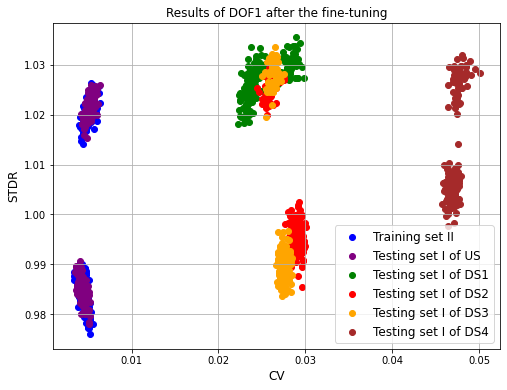

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(train_dof1_newgt_cv,train_dof1_newgt_stdr,color='blue')
plt.scatter(test_ori_dof1_newgt_cv,test_ori_dof1_newgt_stdr,color='purple')
plt.scatter(test_09k1_dof1_newgt_cv,test_09k1_dof1_newgt_stdr,color='green')
plt.scatter(test_09k3_dof1_newgt_cv,test_09k3_dof1_newgt_stdr,color='red')
plt.scatter(test_09k5_dof1_newgt_cv,test_09k5_dof1_newgt_stdr,color='orange')
plt.scatter(test_09k3k7_dof1_newgt_cv,test_09k3k7_dof1_newgt_stdr,color='brown')
plt.xlabel('CV',fontsize=12)
plt.ylabel('STDR',fontsize=12)
plt.legend(['Training set II','Testing set I of US','Testing set I of DS1','Testing set I of DS2','Testing set I of DS3','Testing set I of DS4'],fontsize=12)
plt.title('Results of DOF1 after the fine-tuning',fontsize=12)
plt.grid()

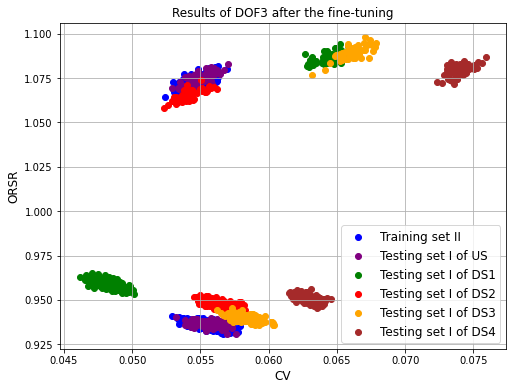

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(train_dof3_newgt_cv,train_dof3_newgt_stdr,color='blue')
plt.scatter(test_ori_dof3_newgt_cv,test_ori_dof3_newgt_stdr,color='purple')
plt.scatter(test_09k1_dof3_newgt_cv,test_09k1_dof3_newgt_stdr,color='green')
plt.scatter(test_09k3_dof3_newgt_cv,test_09k3_dof3_newgt_stdr,color='red')
plt.scatter(test_09k5_dof3_newgt_cv,test_09k5_dof3_newgt_stdr,color='orange')
plt.scatter(test_09k3k7_dof3_newgt_cv,test_09k3k7_dof3_newgt_stdr,color='brown')
plt.xlabel('CV',fontsize=12)
plt.ylabel('ORSR',fontsize=12)
plt.legend(['Training set II','Testing set I of US','Testing set I of DS1','Testing set I of DS2','Testing set I of DS3','Testing set I of DS4'],fontsize=12)
plt.title('Results of DOF3 after the fine-tuning',fontsize=12)
plt.grid()

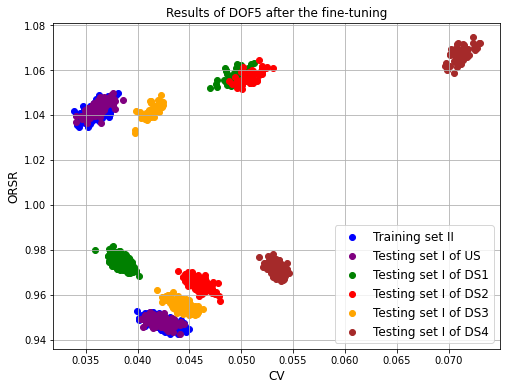

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(train_dof5_newgt_cv,train_dof5_newgt_stdr,color='blue')
plt.scatter(test_ori_dof5_newgt_cv,test_ori_dof5_newgt_stdr,color='purple')
plt.scatter(test_09k1_dof5_newgt_cv,test_09k1_dof5_newgt_stdr,color='green')
plt.scatter(test_09k3_dof5_newgt_cv,test_09k3_dof5_newgt_stdr,color='red')
plt.scatter(test_09k5_dof5_newgt_cv,test_09k5_dof5_newgt_stdr,color='orange')
plt.scatter(test_09k3k7_dof5_newgt_cv,test_09k3k7_dof5_newgt_stdr,color='brown')
plt.xlabel('CV',fontsize=12)
plt.ylabel('ORSR',fontsize=12)
plt.legend(['Training set II','Testing set I of US','Testing set I of DS1','Testing set I of DS2','Testing set I of DS3','Testing set I of DS4'],fontsize=12)
plt.title('Results of DOF5 after the fine-tuning',fontsize=12)
plt.grid()

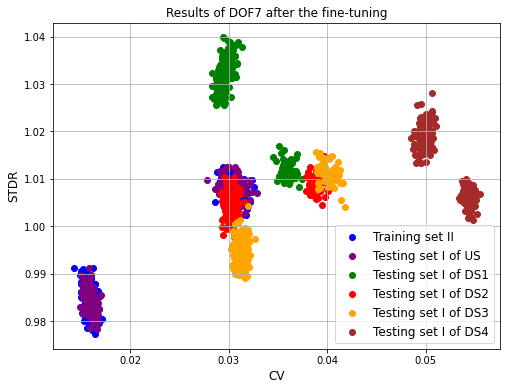

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(train_dof7_newgt_cv,train_dof7_newgt_stdr,color='blue')
plt.scatter(test_ori_dof7_newgt_cv,test_ori_dof7_newgt_stdr,color='purple')
plt.scatter(test_09k1_dof7_newgt_cv,test_09k1_dof7_newgt_stdr,color='green')
plt.scatter(test_09k3_dof7_newgt_cv,test_09k3_dof7_newgt_stdr,color='red')
plt.scatter(test_09k5_dof7_newgt_cv,test_09k5_dof7_newgt_stdr,color='orange')
plt.scatter(test_09k3k7_dof7_newgt_cv,test_09k3k7_dof7_newgt_stdr,color='brown')
plt.xlabel('CV',fontsize=12)
plt.ylabel('STDR',fontsize=12)
plt.legend(['Training set II','Testing set I of US','Testing set I of DS1','Testing set I of DS2','Testing set I of DS3','Testing set I of DS4'],fontsize=12)
plt.title('Results of DOF7 after the fine-tuning',fontsize=12)
plt.grid()

# **Set up OC-SVM**

In [51]:
from sklearn.svm import OneClassSVM

# Set up dof1 classification
ds_dof1_train=np.vstack((train_dof1_newgt_cv,train_dof1_newgt_stdr)).transpose()
ds_dof1_ori_test=np.vstack((test_ori_dof1_newgt_cv,test_ori_dof1_newgt_stdr)).transpose()
ds_dof1_09k1_test=np.vstack((test_09k1_dof1_newgt_cv,test_09k1_dof1_newgt_stdr)).transpose()
ds_dof1_09k3_test=np.vstack((test_09k3_dof1_newgt_cv,test_09k3_dof1_newgt_stdr)).transpose()
ds_dof1_09k5_test=np.vstack((test_09k5_dof1_newgt_cv,test_09k5_dof1_newgt_stdr)).transpose()
ds_dof1_09k3k7_test=np.vstack((test_09k3k7_dof1_newgt_cv,test_09k3k7_dof1_newgt_stdr)).transpose()

cb_ds_dof1_test=np.zeros((200*5,2))
cb_ds_dof1_test[0:200,:]=ds_dof1_ori_test
cb_ds_dof1_test[200:400,:]=ds_dof1_09k1_test
cb_ds_dof1_test[400:600,:]=ds_dof1_09k3_test
cb_ds_dof1_test[600:800,:]=ds_dof1_09k5_test
cb_ds_dof1_test[800:1000,:]=ds_dof1_09k3k7_test

# Set up dof7 classification
ds_dof7_train=np.vstack((train_dof7_newgt_cv,train_dof7_newgt_stdr)).transpose()
ds_dof7_ori_test=np.vstack((test_ori_dof7_newgt_cv,test_ori_dof7_newgt_stdr)).transpose()
ds_dof7_09k1_test=np.vstack((test_09k1_dof7_newgt_cv,test_09k1_dof7_newgt_stdr)).transpose()
ds_dof7_09k3_test=np.vstack((test_09k3_dof7_newgt_cv,test_09k3_dof7_newgt_stdr)).transpose()
ds_dof7_09k5_test=np.vstack((test_09k5_dof7_newgt_cv,test_09k5_dof7_newgt_stdr)).transpose()
ds_dof7_09k3k7_test=np.vstack((test_09k3k7_dof7_newgt_cv,test_09k3k7_dof7_newgt_stdr)).transpose()

cb_ds_dof7_test=np.zeros((200*5,2))
cb_ds_dof7_test[0:200,:]=ds_dof7_ori_test
cb_ds_dof7_test[200:400,:]=ds_dof7_09k1_test
cb_ds_dof7_test[400:600,:]=ds_dof7_09k3_test
cb_ds_dof7_test[600:800,:]=ds_dof7_09k5_test
cb_ds_dof7_test[800:1000,:]=ds_dof7_09k3k7_test

In [52]:
ds_dof7_train[0,:]
np.size(ds_dof7_ori_test)

400

In [53]:
# Set up OC-SVM for DOF1
clf1 = OneClassSVM(nu=0.01, kernel="rbf", gamma=1e5).fit(ds_dof1_train)
prediction_train1=clf1.predict(ds_dof1_train)
prediction1=clf1.predict(cb_ds_dof1_test)

# Set up OC-SVM for DOF7
clf7 = OneClassSVM(nu=0.01, kernel="rbf", gamma=1e5).fit(ds_dof7_train)
prediction_train7=clf7.predict(ds_dof7_train)
prediction7=clf7.predict(cb_ds_dof7_test)

In [54]:
ds_dof7_train.var()

0.23589045870570513

In [55]:
y_true=np.hstack((np.ones(200),np.ones(800)*-1))
y_true.size

1000

In [56]:
# Get confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix1 = confusion_matrix(prediction1,y_true)
cf_matrix7 = confusion_matrix(prediction7,y_true)

In [57]:
cf_matrix1

array([[800,  10],
       [  0, 190]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[0,0] / sum(cf[0,:])
            recall    = cf[0,0] / sum(cf[:,0])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",annot_kws={"size": 20},cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Predicted label')
        plt.xlabel('True label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

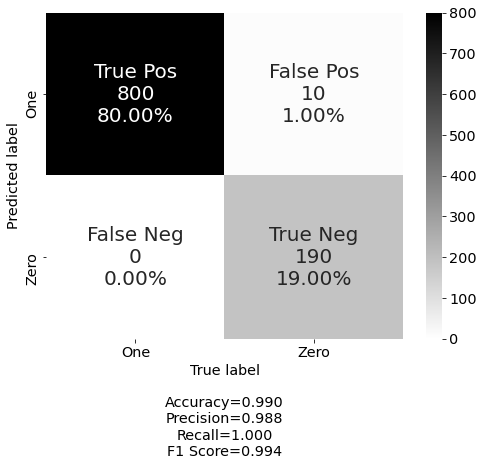

In [59]:
labels = ['True Pos','False Pos','False Neg','True Neg']
categories = ['One', 'Zero']
make_confusion_matrix(cf_matrix1,
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [60]:
(800+198)/1000

0.998

# Finally, we first try a simplest way to check the difference of CV distribution between the training and testing sets

In [61]:
from scipy import stats
from scipy.stats import ks_2samp
# Do standardization for the training CV:
# Try two sample kstest for training and undamaged testing sets:
stats.ks_2samp(train_dof1_cv, test_ori_dof1_cv)

NameError: ignored

**The generated p value is large enough to accept that the two distributions are close**.

In [ ]:
np.mean(train_dof1_cv)

# To formally implement the damage-or-not classification, use a one-class SVM

In [ ]:
from sklearn.svm import OneClassSVM
CV_combine_plus09k1=np.zeros((200+200,1))
CV_combine_plus09k1[0:200,:]=test_ori_dof1_cv.reshape(-1,1)
CV_combine_plus09k1[200:400,:]=test_09k1_dof1_cv.reshape(-1,1)

clf = OneClassSVM(gamma='auto').fit(train_dof1_cv.reshape(-1,1))

prediction=clf.predict(CV_combine_plus09k1)

In [ ]:
# Training prediction:
test_ori_pred=prediction[0:200]
test_09k1_pred=prediction[200:400]

In [ ]:
# See accuracy!
print(np.sum(test_ori_pred-1))
print(np.sum(test_09k1_pred))